# Pre-processing and Creating Training Data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn import tree, metrics
from io import StringIO  
from IPython.display import Image  
import pydotplus

import warnings
warnings.filterwarnings('ignore')

In [2]:
diabetes_cleaned = pd.read_csv(r'C:\Users\ashle\OneDrive\Documents\GitHub\Capstone-2\Diabetes_Class_Cleaned.csv', index_col=0)

In [3]:
diabetes_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 1 to 390
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Cholesterol      390 non-null    int64  
 1   Glucose          390 non-null    int64  
 2   HDL Chol         390 non-null    int64  
 3   Chol/HDL ratio   390 non-null    float64
 4   Age              390 non-null    int64  
 5   Gender           390 non-null    object 
 6   Height           390 non-null    int64  
 7   Weight           390 non-null    int64  
 8   BMI              390 non-null    float64
 9   Systolic BP      390 non-null    int64  
 10  Diastolic BP     390 non-null    int64  
 11  waist            390 non-null    int64  
 12  hip              390 non-null    int64  
 13  Waist/hip ratio  390 non-null    float64
 14  Diabetes         390 non-null    object 
dtypes: float64(3), int64(10), object(2)
memory usage: 48.8+ KB


In [4]:
diabetes_cleaned = pd.DataFrame(diabetes_cleaned.values.repeat(5, axis=0), columns=diabetes_cleaned.columns)

In [5]:
diabetes_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950 entries, 0 to 1949
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Cholesterol      1950 non-null   object
 1   Glucose          1950 non-null   object
 2   HDL Chol         1950 non-null   object
 3   Chol/HDL ratio   1950 non-null   object
 4   Age              1950 non-null   object
 5   Gender           1950 non-null   object
 6   Height           1950 non-null   object
 7   Weight           1950 non-null   object
 8   BMI              1950 non-null   object
 9   Systolic BP      1950 non-null   object
 10  Diastolic BP     1950 non-null   object
 11  waist            1950 non-null   object
 12  hip              1950 non-null   object
 13  Waist/hip ratio  1950 non-null   object
 14  Diabetes         1950 non-null   object
dtypes: object(15)
memory usage: 228.6+ KB


### Create dummy features:

In [6]:
diabetes_cleaned['Diabetes'].unique()

array(['No diabetes', 'Diabetes'], dtype=object)

In [7]:
diabetes_cleaned['Diabetes'].replace('Diabetes', 1, inplace=True)
diabetes_cleaned['Diabetes'].replace('No diabetes', 0, inplace=True)

In [8]:
diabetes_cleaned.head()

,Cholesterol,Glucose,HDL Chol,Chol/HDL ratio,Age,Gender,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Waist/hip ratio,Diabetes
0,193,77,49,3.9,19,female,61,119,22.5,118,70,32,38,0.84,0
1,193,77,49,3.9,19,female,61,119,22.5,118,70,32,38,0.84,0
2,193,77,49,3.9,19,female,61,119,22.5,118,70,32,38,0.84,0
3,193,77,49,3.9,19,female,61,119,22.5,118,70,32,38,0.84,0
4,193,77,49,3.9,19,female,61,119,22.5,118,70,32,38,0.84,0


In [9]:
diabetes_cleaned = pd.get_dummies(diabetes_cleaned)

In [10]:
class_counts = diabetes_cleaned['Diabetes'].value_counts()
class_counts

0    1650
1     300
Name: Diabetes, dtype: int64

In [11]:
class_percentages = pd.Series([(x / diabetes_cleaned.shape[0]) * 100.00 for x in class_counts])
class_percentages

0    84.615385
1    15.384615
dtype: float64

### Create train and test data:

In [12]:
y=diabetes_cleaned.pop('Diabetes')
X=diabetes_cleaned

In [13]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.3, random_state = 42)

### Standardize the data:

In [14]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

# Modeling

### Model 1: Entropy Model

In [15]:
entr_model = tree.DecisionTreeClassifier(criterion="entropy", random_state=42)
entr_model.fit(X_train, y_train)
y_pred = entr_model.predict(X_test)
y_pred = pd.Series(y_pred)
entr_model

DecisionTreeClassifier(criterion='entropy', random_state=42)


(process:20220): GLib-GIO-WARNING **: 17:17:24.625: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2303.17.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs



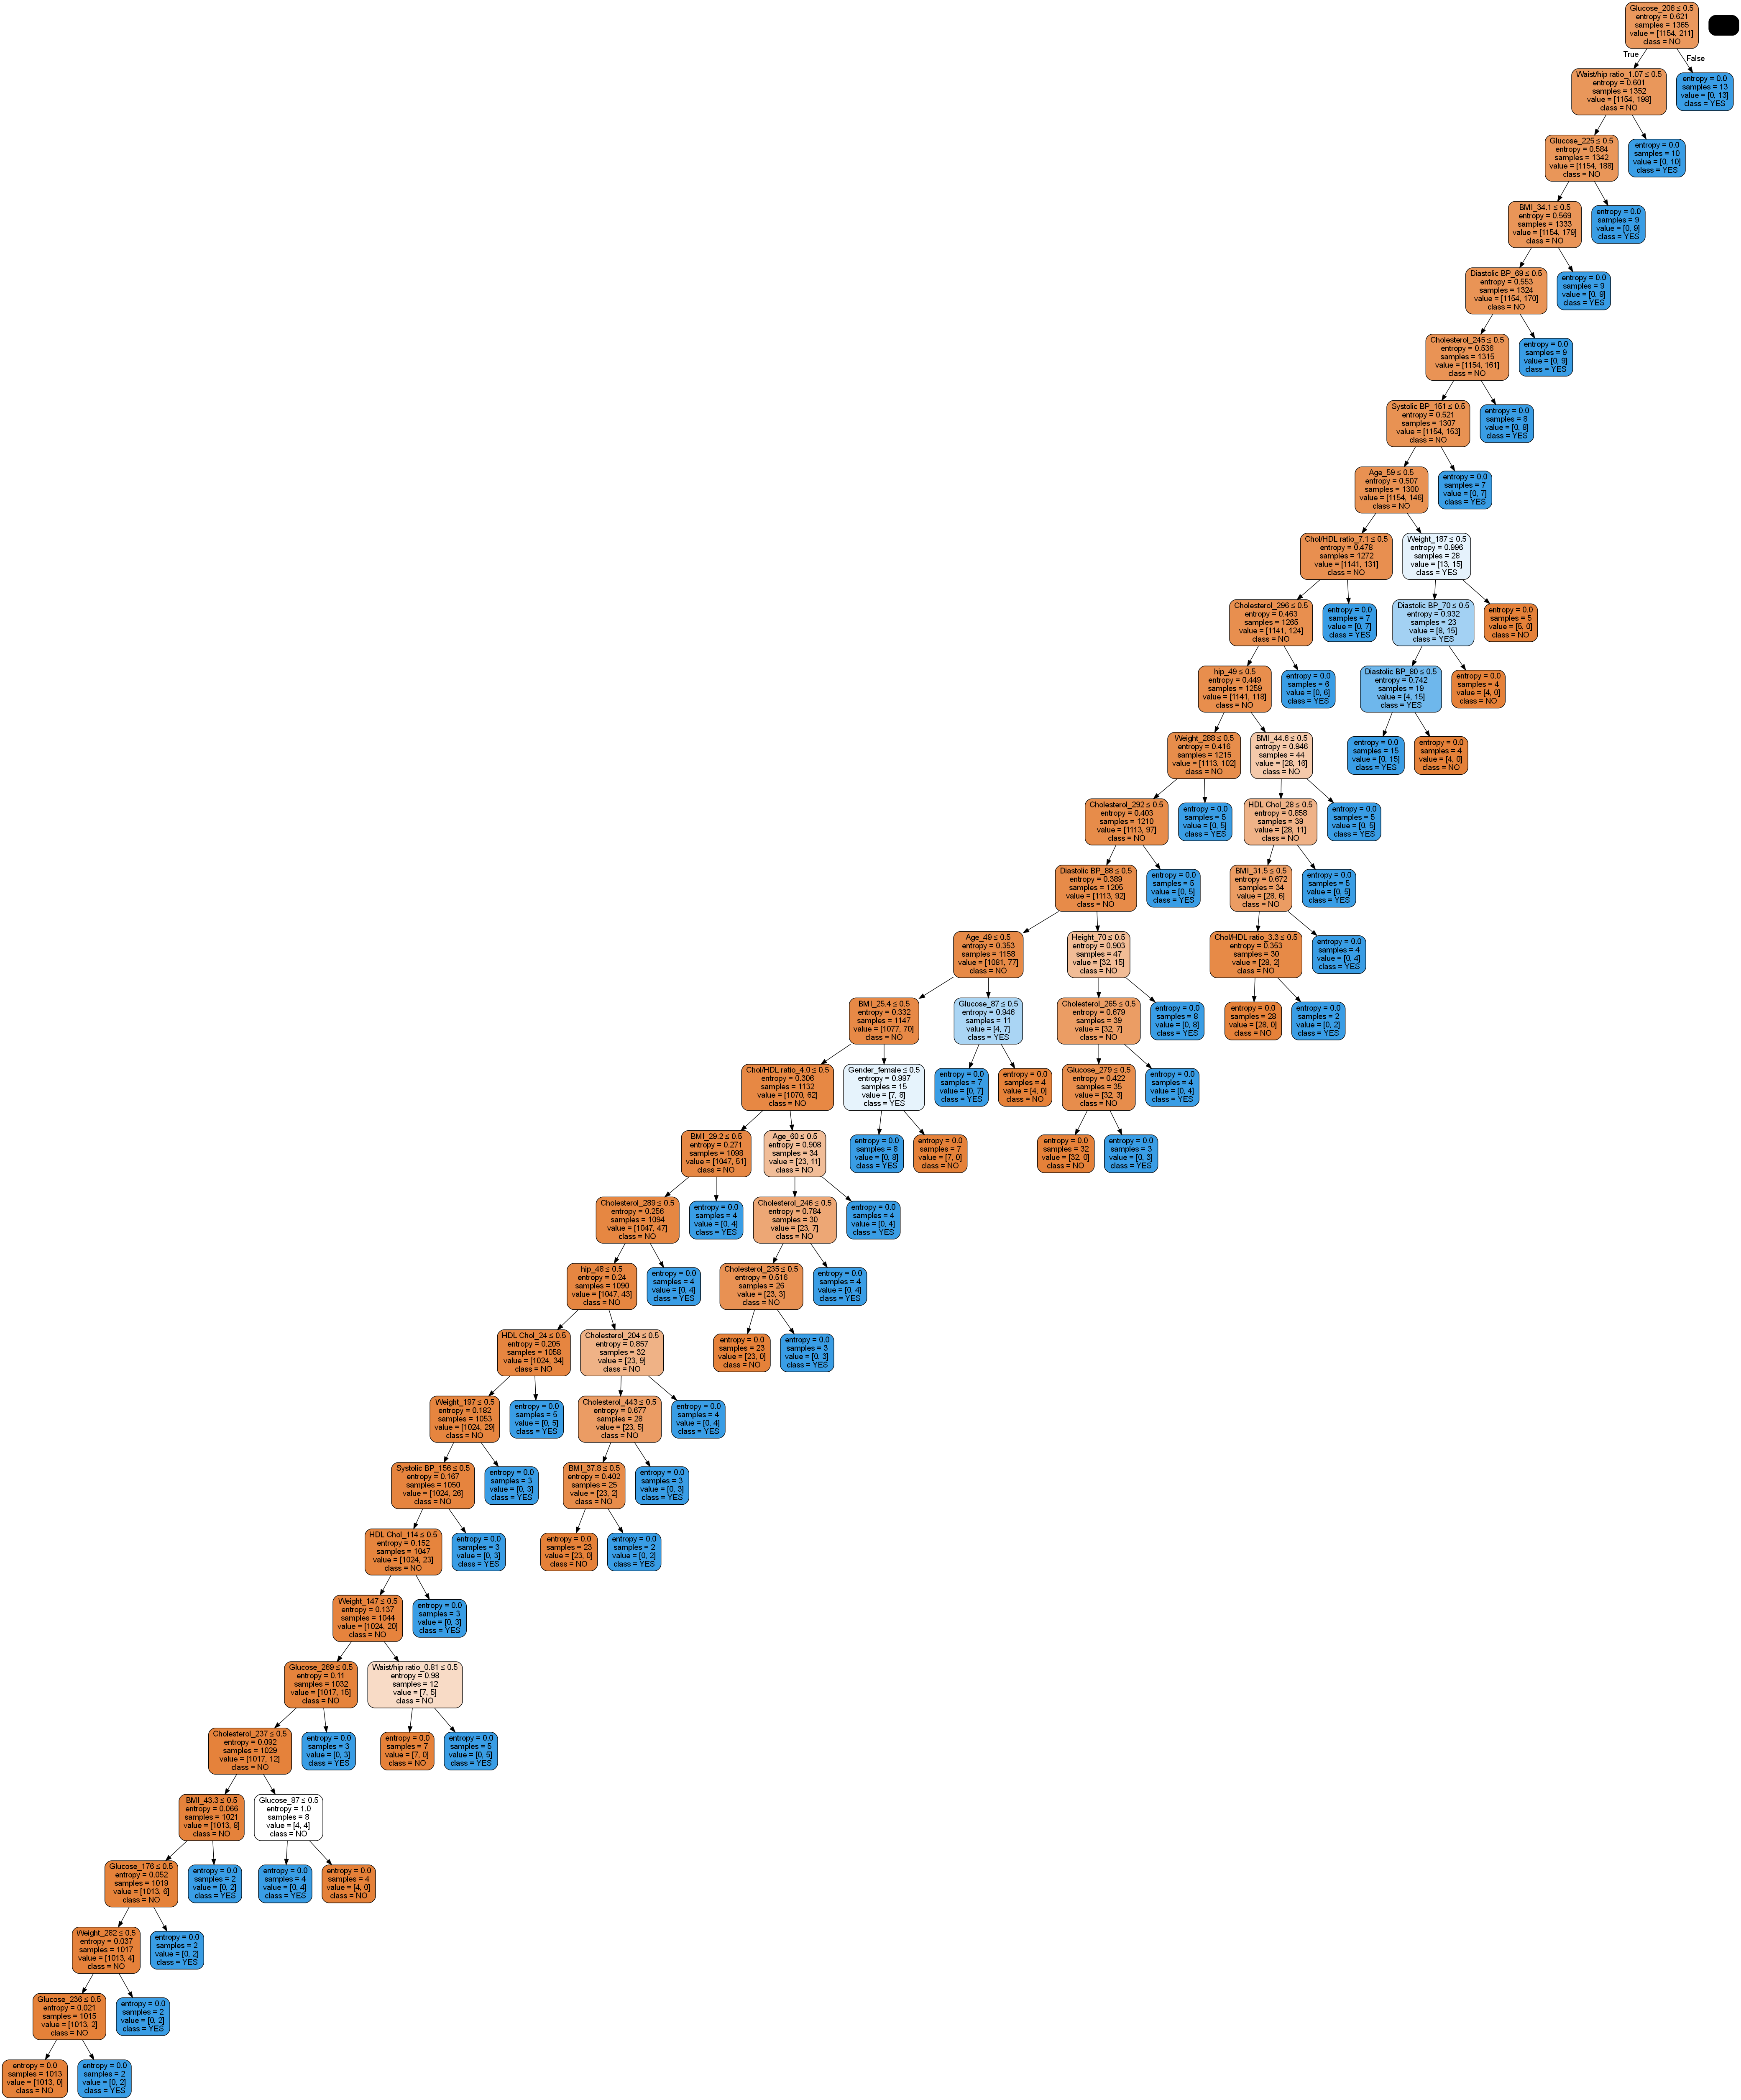

In [16]:
dot_data = StringIO()

tree.export_graphviz(entr_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"]) 

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [17]:
from sklearn.metrics import confusion_matrix

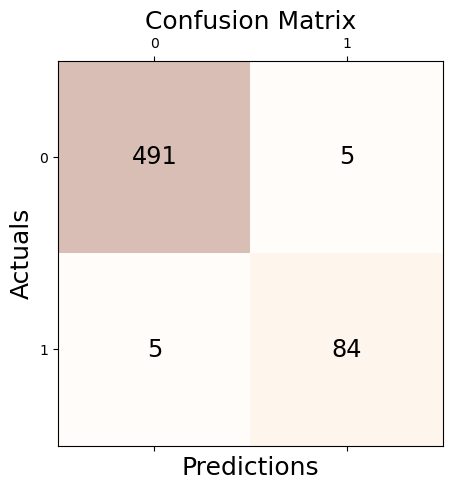

In [18]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### Model 1 Stats:

In [19]:
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Precision:", metrics.precision_score(y_test,y_pred))
print("Recall:", metrics.recall_score(y_test,y_pred))
print("F1 Score:", metrics.f1_score(y_test,y_pred))

Model Entropy - no max depth
Accuracy: 0.9829059829059829
Precision: 0.9438202247191011
Recall: 0.9438202247191011
F1 Score: 0.9438202247191011


### Model 2: Gini Model

In [20]:
gini_model = tree.DecisionTreeClassifier(criterion="gini", random_state=42)
gini_model.fit(X_train, y_train)
y_pred = gini_model.predict(X_test)
y_pred = pd.Series(y_pred)
gini_model

DecisionTreeClassifier(random_state=42)


(process:25112): GLib-GIO-WARNING **: 17:17:26.596: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2303.17.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs

(process:25112): GLib-GIO-WARNING **: 17:17:26.748: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.6.2.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs



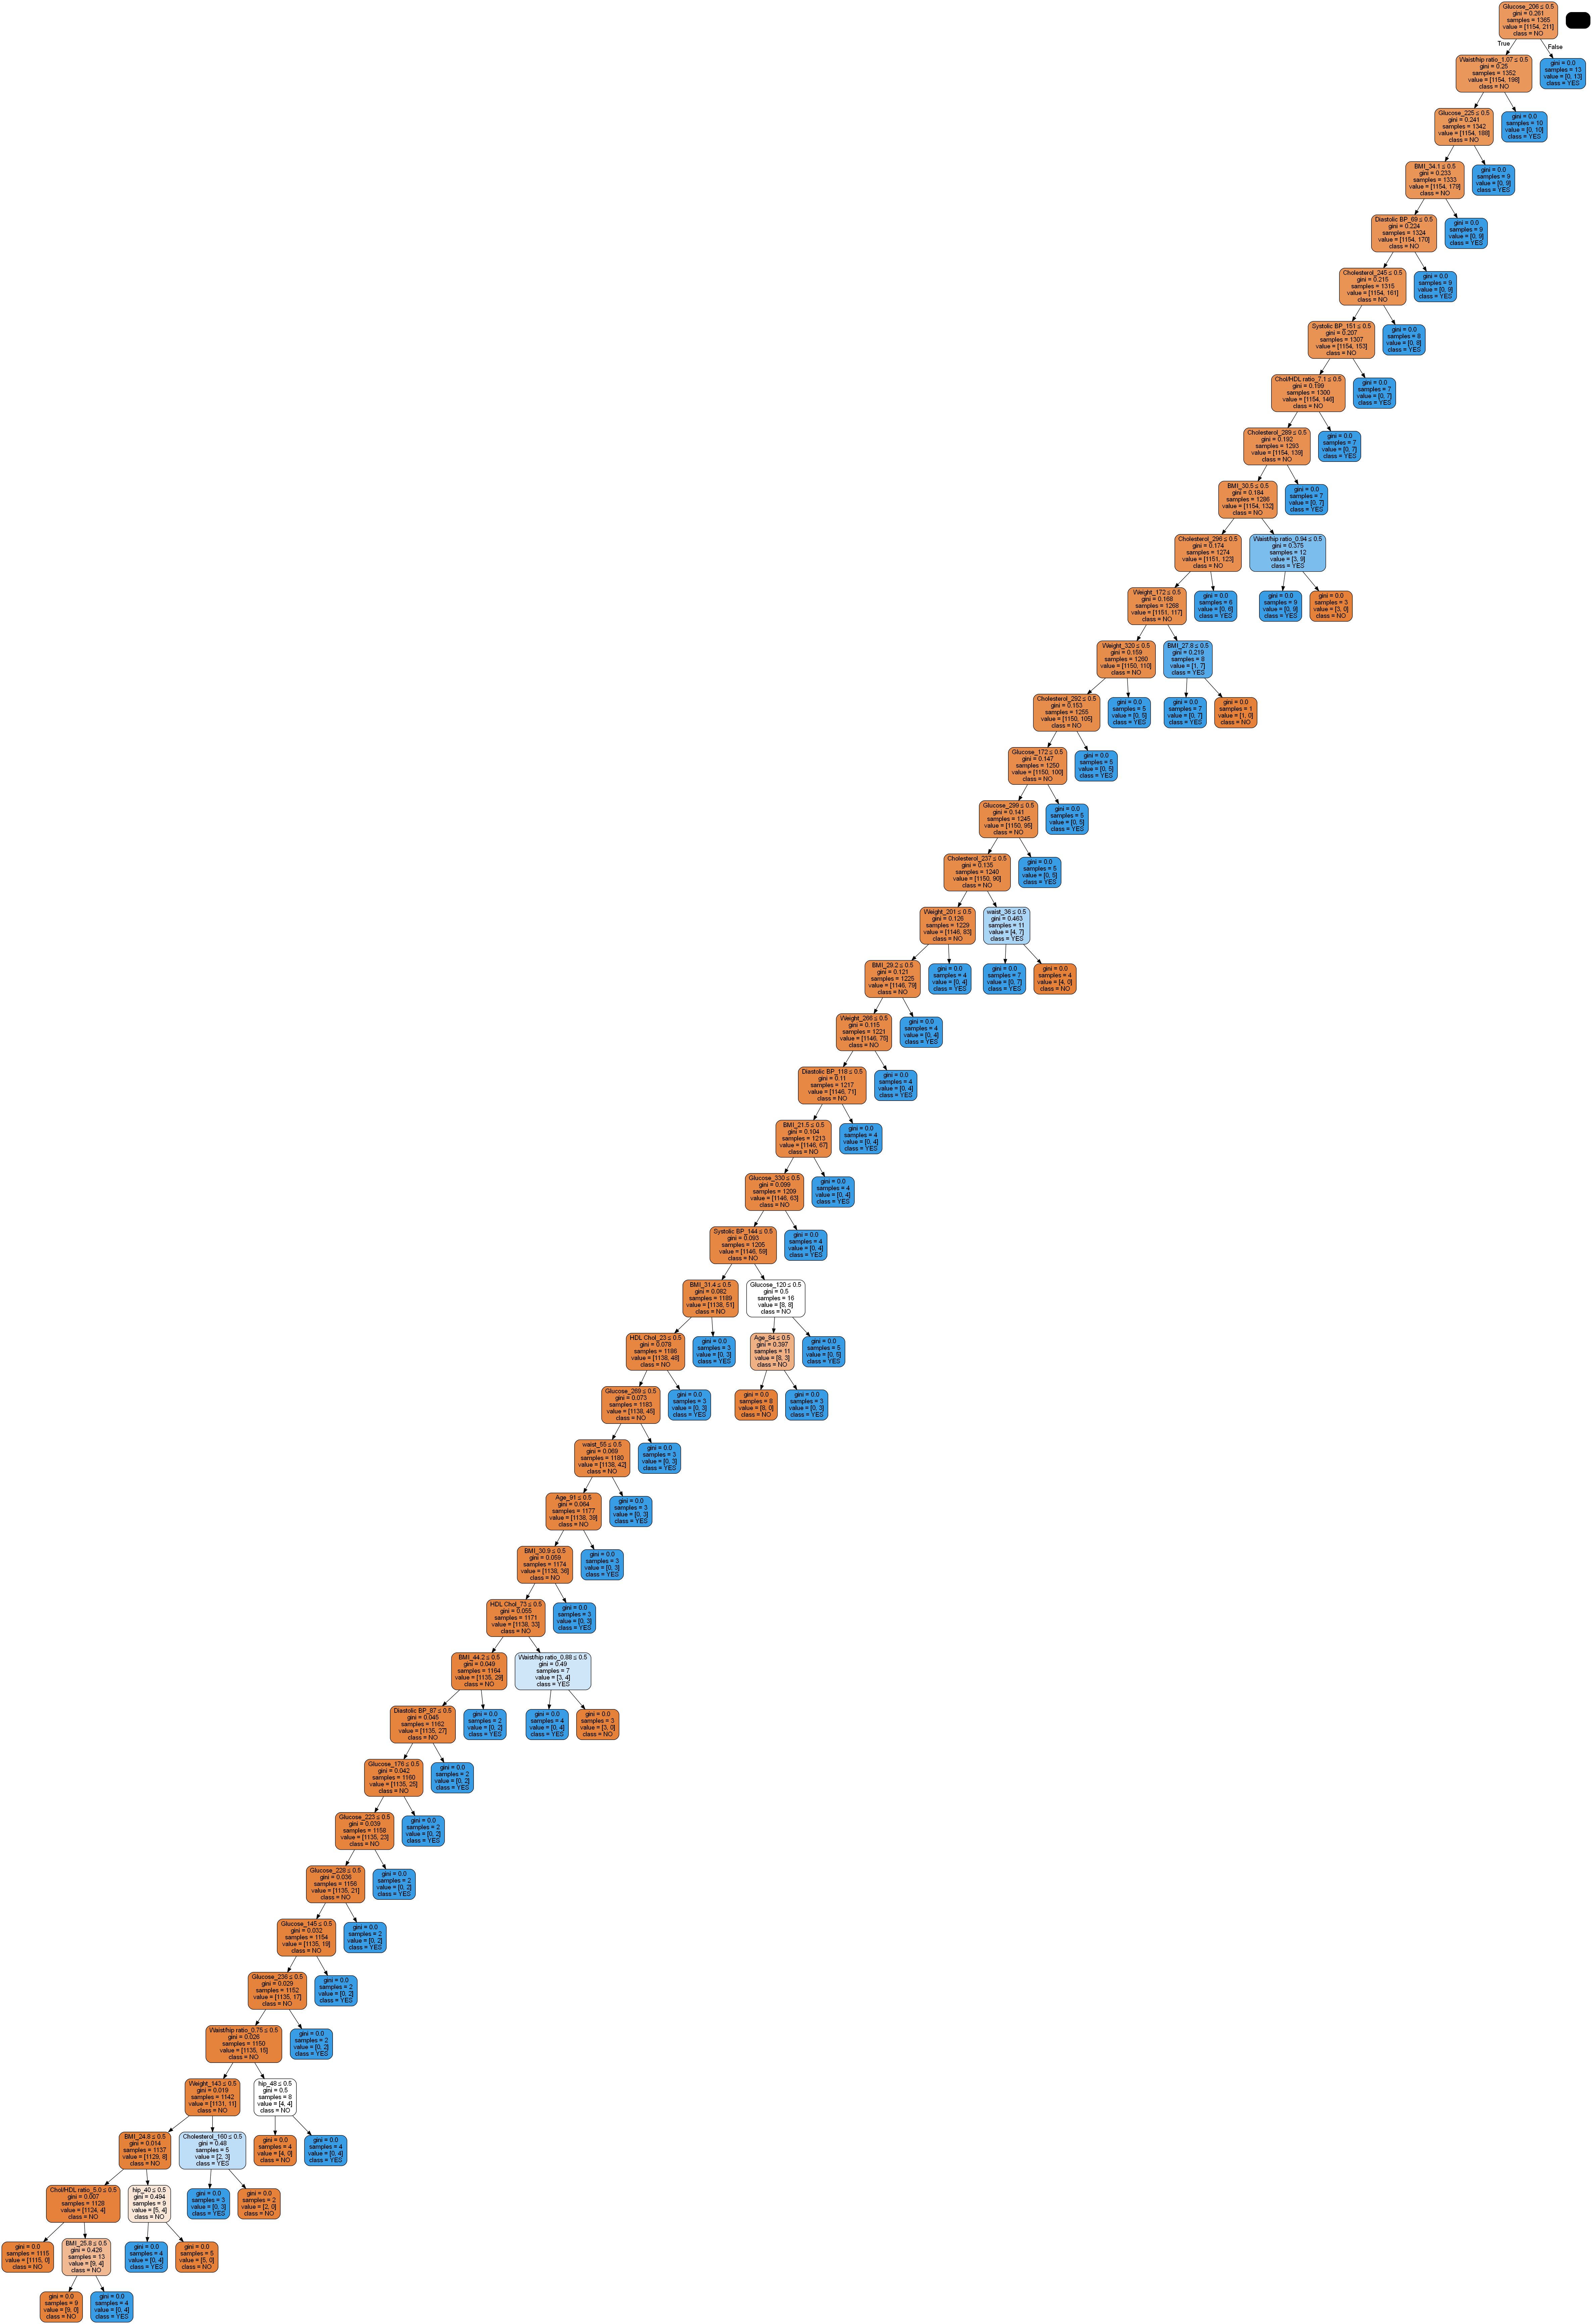

In [21]:
dot_data = StringIO()
tree.export_graphviz(gini_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"]) 

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Model 2 Stats:

In [22]:
print("Gini impurity model - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Precision:", metrics.precision_score(y_test,y_pred))
print("Recall:", metrics.recall_score(y_test,y_pred))
print("F1 Score:", metrics.f1_score(y_test,y_pred))

Gini impurity model - no max depth
Accuracy: 0.9914529914529915
Precision: 1.0
Recall: 0.9438202247191011
F1 Score: 0.9710982658959537


### Parameter tunning:

In [23]:
params = {'criterion':['entropy', 'gini'], 'max_depth':range(2,20)}

In [24]:
gridCV = GridSearchCV(tree.DecisionTreeClassifier(), param_grid=params, cv=10)
gridCV.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(2, 20)})

In [25]:
gridCV.best_params_

{'criterion': 'entropy', 'max_depth': 19}

In [26]:
gridCV.best_score_

0.9406558608844998

## Best Model:

GridSearchCV tells us that the entropy model with a max depth of 19 would be the best model.

In [27]:
entr_model = tree.DecisionTreeClassifier(criterion="entropy", max_depth=19, random_state=42)
entr_model.fit(X_train, y_train)
y_pred = entr_model.predict(X_test)
y_pred = pd.Series(y_pred)
entr_model

DecisionTreeClassifier(criterion='entropy', max_depth=19, random_state=42)

In [30]:
print("Entropy model - max depth 19")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Precision:", metrics.precision_score(y_test,y_pred))
print("Recall:", metrics.recall_score(y_test,y_pred))
print("F1 Score:", metrics.f1_score(y_test,y_pred))

Entropy model - max depth 19
Accuracy: 0.9247863247863248
Precision: 0.9090909090909091
Recall: 0.5617977528089888
F1 Score: 0.6944444444444445


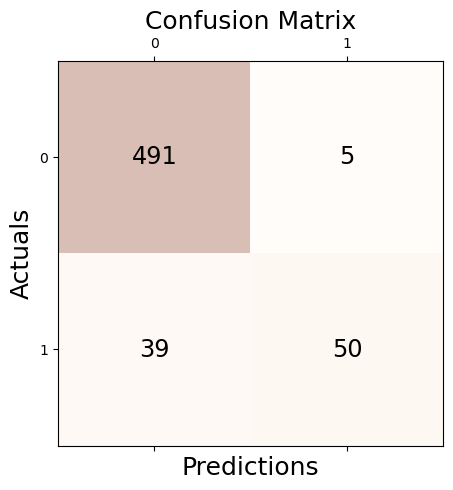

In [31]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()